<a href="https://colab.research.google.com/github/JustKeepPlay/PyProject/blob/main/CNN_TH_ENG_handWritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import and Pip all Install**

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install visualkeras


import zipfile

import os
import warnings
import itertools
import cv2
import seaborn as sns
import pandas as pd
import numpy  as np
from PIL import Image
from sklearn.utils import class_weight
from collections import Counter

import tensorflow as tf
import visualkeras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.optimizer_v2.adam import Adam

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization,LayerNormalization,UnitNormalization
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 15.3 MB/s eta 0:00:00


# **Implement Data and mount Colab**

In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive'

In [ ]:
folder_path = "/content/gdrive/MyDrive/Colab Notebooks/dataset/Character_thai/Dataset3"
#TH_images = os.listdir(folder_path + '/TH/')
TH_images = os.listdir(folder_path + '/TH2/')
ENG_images = os.listdir(folder_path + '/ENG/')
dataset=[]
lab=[]

for image_name in TH_images:
    image=cv2.imread(folder_path + '/TH2/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((32,32))
    dataset.append(np.array(image))
    lab.append(0)

for image_name in ENG_images:
    image=cv2.imread(folder_path + '/ENG/' + image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((32,32))
    dataset.append(np.array(image))
    lab.append(1)


In [ ]:
dataset = np.array(dataset)
lab = np.array(lab)
print(dataset.shape, lab.shape)

(4842, 32, 32, 3) (4842,)


# **Plot Data**

In [ ]:
def plot_state(state):
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(folder_path + "/" + state + "/" + os.listdir(folder_path + "/" + state)[i], target_size=(28, 28))
        plt.imshow(img)
    plt.show()

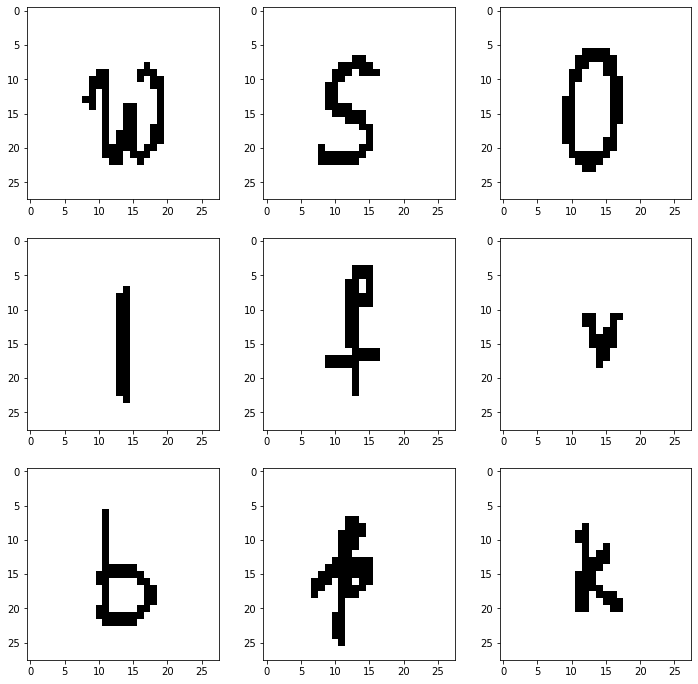

In [ ]:
plot_state('ENG')

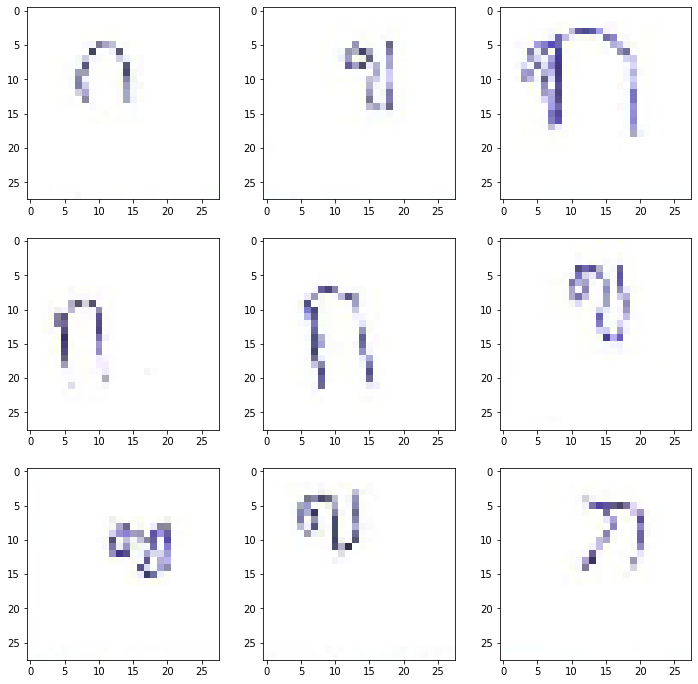

In [ ]:
plot_state('TH')

# split Train and Test **data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, lab, test_size=0.3, shuffle=True, random_state=42)

# Model **CNN**

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(28,28,3)))
model.add(MaxPooling2D((2, 2)))
#model.add(BatchNormalization())
#model.add(LayerNormalization())

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"))
model.add(MaxPooling2D((2, 2)))

#model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
    # kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    # bias_regularizer=regularizers.L2(1e-4),
    # activity_regularizer=regularizers.L2(1e-5)

#Regularizers is an optimization to give penalty to neuron per-layer **in this case I used it instead of Dropout

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = Adam(learning_rate=1e-3)
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

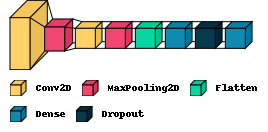

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights
#class weight

{0: 1.243213499633162, 1: 0.8363770977295163}

# **Fit Model**

In [ ]:
history = model.fit(x_train,y_train,batch_size=32 ,epochs = 10, class_weight=class_weights, validation_data=(x_test, y_test),verbose=1)

Epoch 1/10
106/106 [==============================] - 2s 11ms/step - loss: 1.5152 - accuracy: 0.7666 - val_loss: 0.4037 - val_accuracy: 0.8747
Epoch 2/10
106/106 [==============================] - 1s 9ms/step - loss: 0.4137 - accuracy: 0.8775 - val_loss: 0.3000 - val_accuracy: 0.9215
Epoch 3/10
106/106 [==============================] - 1s 9ms/step - loss: 0.3660 - accuracy: 0.8781 - val_loss: 0.3142 - val_accuracy: 0.8926
Epoch 4/10
106/106 [==============================] - 1s 9ms/step - loss: 0.2918 - accuracy: 0.9174 - val_loss: 0.2012 - val_accuracy: 0.9422
Epoch 5/10
106/106 [==============================] - 1s 9ms/step - loss: 0.2249 - accuracy: 0.9374 - val_loss: 0.1580 - val_accuracy: 0.9594
Epoch 6/10
106/106 [==============================] - 1s 9ms/step - loss: 0.1690 - accuracy: 0.9549 - val_loss: 0.1904 - val_accuracy: 0.9504
Epoch 7/10
106/106 [==============================] - 1s 9ms/step - loss: 0.1496 - accuracy: 0.9611 - val_loss: 0.1283 - val_accuracy: 0.9656
Epoch

# plot Loss and **accuracy**

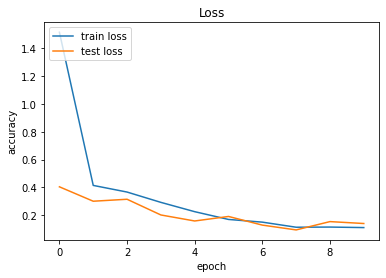

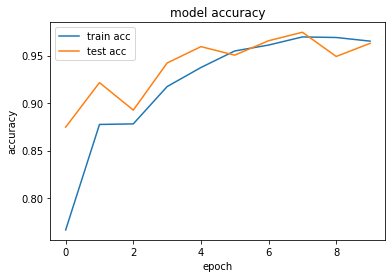

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc = 'upper left')
plt.show()


In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

46/46 [==============================] - 0s 6ms/step - loss: 0.1398 - accuracy: 0.9628
The current model achieved an accuracy of 96.28%!


# Save Model.**h5**

In [ ]:
"""
filepath='/content/gdrive/MyDrive/Colab Notebooks/Model_Ready/model2.h5'
model.save(
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format='h5',
    signatures=None,
    options=None,
    save_traces=True,
)
"""

"\nfilepath='/content/gdrive/MyDrive/Colab Notebooks/Model_Ready/model2.h5'\nmodel.save(\n    filepath,\n    overwrite=True,\n    include_optimizer=True,\n    save_format='h5',\n    signatures=None,\n    options=None,\n    save_traces=True,\n)\n"

TEST


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import regularizers

# Load the MobileNet model with pre-trained weights from ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a new fully connected layer for classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(128,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
x = Dropout(0.20)(x)
x = Dense(64,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
x = Dropout(0.20)(x)
x = Dense(32,kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
170/170 [==============================] - 60s 296ms/step - loss: 2.3831 - accuracy: 0.9531 - val_loss: 1.2936 - val_accuracy: 0.9546
Epoch 2/50
170/170 [==============================] - 49s 288ms/step - loss: 0.7641 - accuracy: 0.9867 - val_loss: 0.4404 - val_accuracy: 0.9952
Epoch 3/50
170/170 [==============================] - 50s 293ms/step - loss: 0.2974 - accuracy: 0.9867 - val_loss: 0.3308 - val_accuracy: 0.9264
Epoch 4/50
170/170 [==============================] - 48s 284ms/step - loss: 0.1337 - accuracy: 0.9941 - val_loss: 0.0912 - val_accuracy: 0.9986
Epoch 5/50
170/170 [==============================] - 49s 289ms/step - loss: 0.0660 - accuracy: 0.9994 - val_loss: 0.0527 - val_accuracy: 0.9993
Epoch 6/50
170/170 [==============================] - 50s 294ms/step - loss: 0.0592 - accuracy: 0.9959 - val_loss: 0.5197 - val_accuracy: 0.8266
Epoch 7/50
170/170 [==============================] - 48s 285ms/step - loss: 0.0699 - accuracy: 0.9947 - val_loss: 0.0532 - val_ac

In [ ]:
results = model.evaluate(x_test, y_test)
print('The current model achieved an accuracy of {}%!'.format(round(results[1]*100,2)))

46/46 [==============================] - 4s 81ms/step - loss: 0.0873 - accuracy: 0.9993
The current model achieved an accuracy of 99.93%!


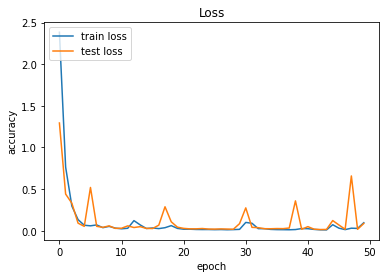

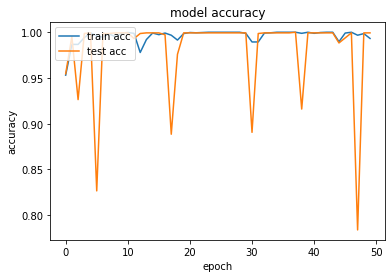

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc = 'upper left')
plt.show()